# Importing Libraries

In [723]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [724]:
# Importing Dataset

In [725]:
dataset = pd.read_csv('/Users/ahmedbinnayeem/Desktop/kaggle_diabetes.csv')


# Data Statistics

In [726]:
# Preview data
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [727]:
#Dataset Dimensions
dataset.shape

(1025, 9)

In [728]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1025 non-null   int64  
 1   Glucose                   1025 non-null   int64  
 2   BloodPressure             1025 non-null   int64  
 3   SkinThickness             1025 non-null   int64  
 4   Insulin                   1025 non-null   int64  
 5   BMI                       1025 non-null   float64
 6   DiabetesPedigreeFunction  1025 non-null   float64
 7   Age                       1025 non-null   int64  
 8   Outcome                   1025 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 72.2 KB


In [729]:
# Statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,1025.0,3.720000,3.332288,0.000,1.000,3.000,6.00,17.00
Glucose,1025.0,120.087805,32.712020,0.000,97.000,116.000,139.00,199.00
BloodPressure,1025.0,68.912195,19.317862,0.000,64.000,72.000,80.00,122.00
SkinThickness,1025.0,20.807805,15.706883,0.000,0.000,23.000,32.00,99.00
Insulin,1025.0,78.626341,108.906756,0.000,0.000,42.000,125.00,744.00
BMI,1025.0,31.951415,7.810497,0.000,27.200,32.000,36.60,67.10
DiabetesPedigreeFunction,1025.0,0.474861,0.328544,0.078,0.244,0.378,0.63,2.42
Age,1025.0,33.259512,11.981552,21.000,24.000,29.000,41.00,81.00
Outcome,1025.0,0.332683,0.471404,0.000,0.000,0.000,1.00,1.00


In [730]:
# Count of null values
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Data Visualisation

<AxesSubplot:xlabel='Outcome', ylabel='count'>

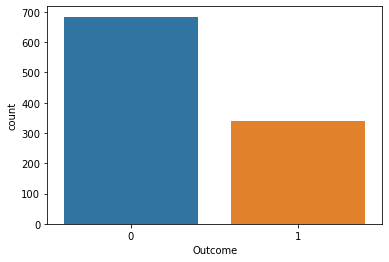

In [731]:
# Outcome countplot
sns.countplot(x = 'Outcome', data = dataset)

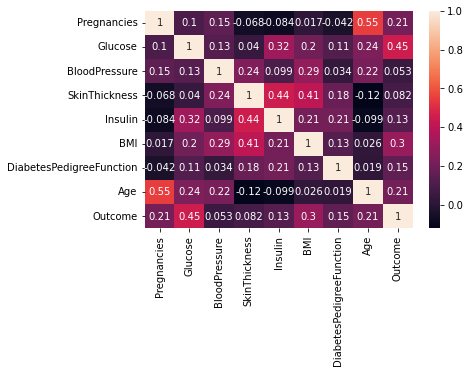

In [732]:
# Heatmap
sns.heatmap(dataset.corr(), annot = True)
plt.show()

# Data Preprocessing

In [733]:
dataset_new = dataset

In [734]:
del dataset_new["Pregnancies"]

In [735]:
del dataset_new["DiabetesPedigreeFunction"]

In [736]:

del dataset_new["SkinThickness"]

In [737]:

del dataset_new["BloodPressure"]

In [738]:
dataset_new

,Glucose,Insulin,BMI,Age,Outcome
0,138,0,33.6,47,1
1,84,125,38.2,23,0
2,145,0,44.2,31,1
3,135,250,42.3,24,1
4,139,480,40.7,21,0
...,...,...,...,...,...
1020,99,54,26.9,32,0
1021,91,0,32.4,27,0
1022,95,88,26.1,22,0
1023,99,18,38.6,21,0


In [739]:
# Replacing zero values with NaN
dataset_new[["Glucose", "Insulin", "BMI"]]= dataset_new[["Glucose", "Insulin", "BMI"]].replace(0, np.NaN) 


In [740]:
#Count Nan
dataset_new.isnull().sum()

Glucose      9
Insulin    487
BMI         14
Age          0
Outcome      0
dtype: int64

In [741]:
# Replacing NaN with mean values
dataset_new["Glucose"].fillna(dataset_new["Glucose"].mean(), inplace = True)
dataset_new["Insulin"].fillna(dataset_new["Insulin"].mean(), inplace = True)
dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace = True)

In [742]:
# Statistical summary
dataset_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,1025.0,121.151575,30.695370,44.0,99.0,117.000000,139.000000,199.0
Insulin,1025.0,149.799257,79.114794,14.0,115.0,149.799257,149.799257,744.0
BMI,1025.0,32.393867,6.844930,18.2,27.4,32.393867,36.600000,67.1
Age,1025.0,33.259512,11.981552,21.0,24.0,29.000000,41.000000,81.0
Outcome,1025.0,0.332683,0.471404,0.0,0.0,0.000000,1.000000,1.0


In [743]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset_new)

In [744]:
dataset_scaled = pd.DataFrame(dataset_scaled)

In [745]:
dataset_scaled

,0,1,2,3,4
0,0.606452,0.186026,0.314928,0.433333,1.0
1,0.258065,0.152055,0.408998,0.033333,0.0
2,0.651613,0.186026,0.531697,0.166667,1.0
3,0.587097,0.323288,0.492843,0.050000,1.0
4,0.612903,0.638356,0.460123,0.000000,0.0
...,...,...,...,...,...
1020,0.354839,0.054795,0.177914,0.183333,0.0
1021,0.303226,0.186026,0.290389,0.100000,0.0
1022,0.329032,0.101370,0.161554,0.016667,0.0
1023,0.354839,0.005479,0.417178,0.000000,0.0


# Method: OverSampling

In [746]:
count_class_0, count_class_1 = dataset_new.Outcome.value_counts()

#Divide by class
dataset_new_class_0 = dataset_new[dataset_new['Outcome']==0]
dataset_new_class_1 = dataset_new[dataset_new['Outcome']==1]

In [747]:
count_class_0, count_class_1 

(684, 341)

In [748]:
dataset_new_class_0.shape

(684, 5)

In [749]:
dataset_new_class_1.shape

(341, 5)

In [750]:
dataset_new_class_1_over= dataset_new_class_1.sample(count_class_0, replace=True)

dataset_new_test_over = pd.concat([dataset_new_class_0,dataset_new_class_1_over],axis=0)
dataset_new_test_over.shape

(1368, 5)

In [751]:
print(' Over-sampling:')  # verifying both the class have same no. of samples
print(dataset_new_test_over.Outcome.value_counts())

 Over-sampling:
0    684
1    684
Name: Outcome, dtype: int64


# Train and Test Split

In [752]:
X = dataset_new_test_over.drop('Outcome', axis='columns')
Y = dataset_new_test_over['Outcome']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 40, stratify = Y )

In [753]:
Y_test.value_counts()

1    171
0    171
Name: Outcome, dtype: int64

In [754]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (1026, 4)
X_test shape: (342, 4)
Y_train shape: (1026,)
Y_test shape: (342,)


# Training Model using Algorithms 

In [755]:
#Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 40)
logreg.fit(X_train, Y_train)


LogisticRegression(random_state=40)

In [756]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 40)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=40)

In [757]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 40)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=40)

In [758]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

In [759]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)

In [760]:
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 72.51461988304094
Decision tree: 90.93567251461988
Random Forest: 92.98245614035088


In [761]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_ranfor)
cm

array([[151,  20],
       [  4, 167]])

<AxesSubplot:>

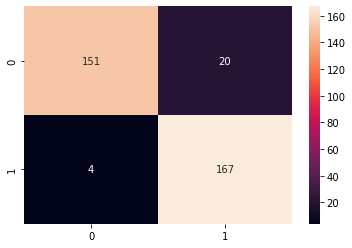

In [762]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True, fmt="d")

In [763]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_ranfor))

              precision    recall  f1-score   support

           0       0.97      0.88      0.93       171
           1       0.89      0.98      0.93       171

    accuracy                           0.93       342
   macro avg       0.93      0.93      0.93       342
weighted avg       0.93      0.93      0.93       342

